In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('PokemonData-with-greyscale')

In [3]:
folder_list = os.listdir()
folder_list

['train', 'validation']

In [4]:
if os.path.isdir('train/Abra/') is False: 
    os.mkdir('train')
    os.mkdir('validation')
    
    for folder in folder_list:
        shutil.move(f'{folder}', 'train')
        os.mkdir(f'validation/{folder}')
    
        validation_samples = random.sample(os.listdir(f'train/{folder}'), 10)
        for file_names in validation_samples:
            shutil.move(f'train/{folder}/{file_names}', f'validation/{folder}')
            
            
os.chdir('../..')            

In [5]:
# function to show images, taken from tensorflows website

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
os.chdir('pokemon-classifier')

In [7]:
folder_list = os.listdir()
folder_list

['.DS_Store',
 '.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'bw_generator.py',
 'Model_Training.ipynb',
 'pokemon-prediction',
 'PokemonData-with-greyscale',
 'pokemon_classifier_dropout=60,30_lr=0.00001.h5',
 'pokemon_classifier_dropout=8,6_lr=0.0001.h5',
 'pokemon_pred_mobilenet.h5',
 'templates']

In [8]:
os.chdir('PokemonData-with-greyscale')
folder_list = os.listdir()
folder_list

['train', 'validation']

In [9]:
os.chdir('train')
folder_list = os.listdir()
folder_list

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

In [10]:
pokemon_folders = os.listdir()
pokemon_folders

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array, load_img
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            channel_shift_range=100
                            )    


In [12]:
import re
augmented = False

images = os.listdir("Abra")
aug_images =  [i for i in images if re.search("^aug-image-", i)]

if len(aug_images) > 0:   
    augmented = True
    

In [13]:
if not augmented:
    for folder in pokemon_folders:
        os.chdir(folder)
        while(True):
            chosen_image = random.choice(os.listdir())
            if not chosen_image.startswith("gs") and chosen_image.endswith('.jpg'):
                break

        print(f'{folder}: {chosen_image}')
        current_dir = os.getcwd()
        img = load_img(chosen_image)
        x=img_to_array(img)
        x=x.reshape((1,) + x.shape)

        i=0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=current_dir, 
                                  save_prefix='aug-image-', save_format='jpeg'):
            i +=1
            if i>=10:
                break


        os.chdir('../')       

    

In [14]:
os.chdir('../../')
print(os.getcwd())
train_path = 'PokemonData-with-greyscale/train'
valid_path = 'PokemonData-with-greyscale/validation'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)


C:\Users\ahmed\Desktop\pokemon-classifier
Found 7783 images belonging to 150 classes.
Found 1494 images belonging to 150 classes.


In [15]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

x = mobile.layers[-6].output
x = Dense(units=512, kernel_regularizer='l2')(x)
output = Dense(units=150, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)

In [17]:
for layer in model.layers[:-24]:
    layer.trainable = False

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [19]:
print(model.layers[-3].name)
print(model.layers[-2].name)

global_average_pooling2d
dense


In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

updated_model = Sequential()
for layer in model.layers:
    updated_model.add(layer)
    if layer.name in ['global_average_pooling2d','dense']:
        if layer.name == 'dense':
            updated_model.add(Dropout(0.8))
        else:
            updated_model.add(Dropout(0.6))

model = updated_model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)      2

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\ahmed\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [23]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=80,
            verbose=2
)

Epoch 1/80
779/779 - 42s - loss: 16.0258 - accuracy: 0.0146 - val_loss: 10.0404 - val_accuracy: 0.2644
Epoch 2/80
779/779 - 38s - loss: 11.3677 - accuracy: 0.0450 - val_loss: 9.5957 - val_accuracy: 0.4618
Epoch 3/80
779/779 - 37s - loss: 9.8846 - accuracy: 0.1011 - val_loss: 8.3869 - val_accuracy: 0.5930
Epoch 4/80
779/779 - 37s - loss: 8.6116 - accuracy: 0.2062 - val_loss: 6.9580 - val_accuracy: 0.6948
Epoch 5/80
779/779 - 37s - loss: 7.3602 - accuracy: 0.3075 - val_loss: 5.7405 - val_accuracy: 0.7724
Epoch 6/80
779/779 - 37s - loss: 6.2156 - accuracy: 0.4270 - val_loss: 4.6972 - val_accuracy: 0.8153
Epoch 7/80
779/779 - 37s - loss: 5.3153 - accuracy: 0.5199 - val_loss: 4.0335 - val_accuracy: 0.8548
Epoch 8/80
779/779 - 37s - loss: 4.5787 - accuracy: 0.5933 - val_loss: 3.5116 - val_accuracy: 0.8822
Epoch 9/80
779/779 - 37s - loss: 3.9800 - accuracy: 0.6523 - val_loss: 3.0531 - val_accuracy: 0.9003
Epoch 10/80
779/779 - 37s - loss: 3.4874 - accuracy: 0.7081 - val_loss: 2.7012 - val_acc

In [24]:
model.save('final_classifier_dropout=80,60_lr=0.0001,epoch=80.h5')

In [25]:
label_dict = {'Abra': 0,
 'Aerodactyl': 1,
 'Alakazam': 2,
 'Alolan Sandslash': 3,
 'Arbok': 4,
 'Arcanine': 5,
 'Articuno': 6,
 'Beedrill': 7,
 'Bellsprout': 8,
 'Blastoise': 9,
 'Bulbasaur': 10,
 'Butterfree': 11,
 'Caterpie': 12,
 'Chansey': 13,
 'Charizard': 14,
 'Charmander': 15,
 'Charmeleon': 16,
 'Clefable': 17,
 'Clefairy': 18,
 'Cloyster': 19,
 'Cubone': 20,
 'Dewgong': 21,
 'Diglett': 22,
 'Ditto': 23,
 'Dodrio': 24,
 'Doduo': 25,
 'Dragonair': 26,
 'Dragonite': 27,
 'Dratini': 28,
 'Drowzee': 29,
 'Dugtrio': 30,
 'Eevee': 31,
 'Ekans': 32,
 'Electabuzz': 33,
 'Electrode': 34,
 'Exeggcute': 35,
 'Exeggutor': 36,
 'Farfetchd': 37,
 'Fearow': 38,
 'Flareon': 39,
 'Gastly': 40,
 'Gengar': 41,
 'Geodude': 42,
 'Gloom': 43,
 'Golbat': 44,
 'Goldeen': 45,
 'Golduck': 46,
 'Golem': 47,
 'Graveler': 48,
 'Grimer': 49,
 'Growlithe': 50,
 'Gyarados': 51,
 'Haunter': 52,
 'Hitmonchan': 53,
 'Hitmonlee': 54,
 'Horsea': 55,
 'Hypno': 56,
 'Ivysaur': 57,
 'Jigglypuff': 58,
 'Jolteon': 59,
 'Jynx': 60,
 'Kabuto': 61,
 'Kabutops': 62,
 'Kadabra': 63,
 'Kakuna': 64,
 'Kangaskhan': 65,
 'Kingler': 66,
 'Koffing': 67,
 'Krabby': 68,
 'Lapras': 69,
 'Lickitung': 70,
 'Machamp': 71,
 'Machoke': 72,
 'Machop': 73,
 'Magikarp': 74,
 'Magmar': 75,
 'Magnemite': 76,
 'Magneton': 77,
 'Mankey': 78,
 'Marowak': 79,
 'Meowth': 80,
 'Metapod': 81,
 'Mew': 82,
 'Mewtwo': 83,
 'Moltres': 84,
 'MrMime': 85,
 'Muk': 86,
 'Nidoking': 87,
 'Nidoqueen': 88,
 'Nidorina': 89,
 'Nidorino': 90,
 'Ninetales': 91,
 'Oddish': 92,
 'Omanyte': 93,
 'Omastar': 94,
 'Onix': 95,
 'Paras': 96,
 'Parasect': 97,
 'Persian': 98,
 'Pidgeot': 99,
 'Pidgeotto': 100,
 'Pidgey': 101,
 'Pikachu': 102,
 'Pinsir': 103,
 'Poliwag': 104,
 'Poliwhirl': 105,
 'Poliwrath': 106,
 'Ponyta': 107,
 'Porygon': 108,
 'Primeape': 109,
 'Psyduck': 110,
 'Raichu': 111,
 'Rapidash': 112,
 'Raticate': 113,
 'Rattata': 114,
 'Rhydon': 115,
 'Rhyhorn': 116,
 'Sandshrew': 117,
 'Sandslash': 118,
 'Scyther': 119,
 'Seadra': 120,
 'Seaking': 121,
 'Seel': 122,
 'Shellder': 123,
 'Slowbro': 124,
 'Slowpoke': 125,
 'Snorlax': 126,
 'Spearow': 127,
 'Squirtle': 128,
 'Starmie': 129,
 'Staryu': 130,
 'Tangela': 131,
 'Tauros': 132,
 'Tentacool': 133,
 'Tentacruel': 134,
 'Vaporeon': 135,
 'Venomoth': 136,
 'Venonat': 137,
 'Venusaur': 138,
 'Victreebel': 139,
 'Vileplume': 140,
 'Voltorb': 141,
 'Vulpix': 142,
 'Wartortle': 143,
 'Weedle': 144,
 'Weepinbell': 145,
 'Weezing': 146,
 'Wigglytuff': 147,
 'Zapdos': 148,
 'Zubat': 149}

In [26]:
def prepare_image(file):
    img_path = 'pokemon-prediction/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

C:\Users\ahmed\Desktop\pokemon-classifier


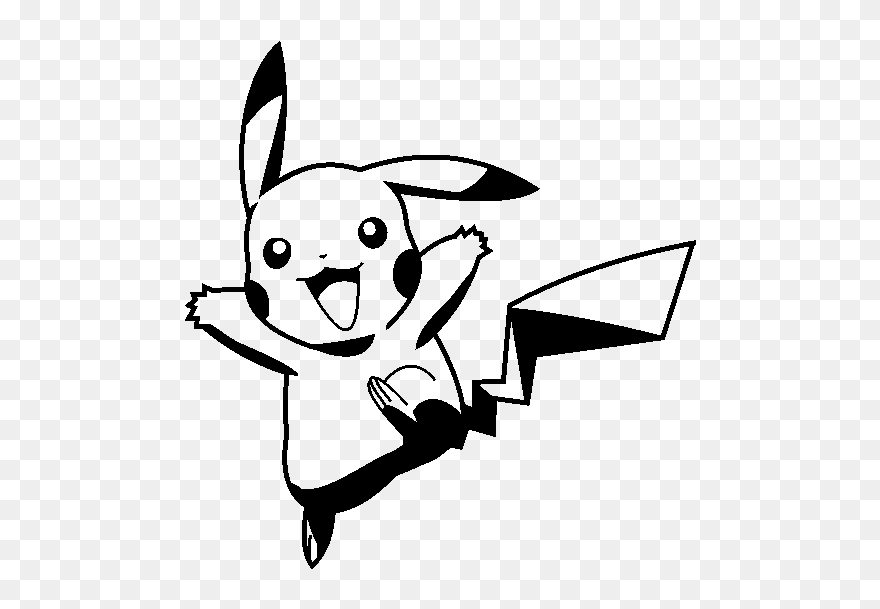

In [27]:
print(os.getcwd())
from IPython.display import Image
Image(filename='pokemon-prediction/1.png', width=300,height=200)

In [28]:
preprocessed_image = prepare_image('1.png')
predictions = model.predict(preprocessed_image)
out = np.argmax(predictions)
print(list(label_dict.keys())[list(label_dict.values()).index(out)])

Mew
